# Text Summarization using machine learning techniques

## Exploratory Data Analysis

### Importing the libraries

In [14]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [19]:
!pip install wordcloud

     |████████████████████████████████| 361 kB 4.9 MB/s eta 0:00:01


### Loading the dataset
First step, load the whole dataset hosted locally

In [6]:
# Run only when new datafiles have been stored in GS
%%bash
gsutil cp gs://mlend_bucket/data/news_summary/news_summary_more.csv ../data/

Copying gs://mlend_bucket/data/news_summary/news_summary_more.csv...
- [1 files][ 39.5 MiB/ 39.5 MiB]                                                
Operation completed over 1 objects/39.5 MiB.                                     


In [2]:
summary = pd.read_csv('../data/news_summary.csv', encoding='iso-8859-1')
#raw = pd.read_csv('../data/news_summary_more.csv', encoding='iso-8859-1')
summary.head(5)

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [3]:
print(summary['headlines'][0],'\n',summary['text'][0],'\n',summary['ctext'][0])

Daman & Diu revokes mandatory Rakshabandhan in offices order 
 The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media. 
 The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a sui

In [4]:
# Count the number of examples
print('Dataset examples: ', len(summary))
summary.describe()

Dataset examples:  4514


,author,date,headlines,read_more,text,ctext
count,4514,4514,4514,4514,4514,4396
unique,45,240,4514,4461,4514,4341
top,Chhavi Tyagi,"19 Jul 2017,Wednesday",US ends laptop ban on flights from Middle East...,http://indiatoday.intoday.in/story/assembly-el...,Actor Anupam Kher has said that the rules of t...,AAJ TAK LIVE TV WITH LIVE ELECTION RESULTS I c...
freq,559,76,1,13,1,13


When we see some examples, our variable candidate for 'Summary' would be text or perhaps a shorter one, 'Headlines'. I choose the longer one. And the variable ctext as the source text or complete text.
Then, we can observe that there are some rows with a null value in the variable ctext. So our first step would be to drop those rows. 

In [5]:
summary.drop_duplicates(subset=["ctext"],inplace=True)
summary.dropna(inplace=True)
summary.reset_index(drop=True,inplace=True)
summary.describe()

,author,date,headlines,read_more,text,ctext
count,4341,4341,4341,4341,4341,4341
unique,45,240,4341,4341,4341,4341
top,Chhavi Tyagi,"19 Jul 2017,Wednesday",US ends laptop ban on flights from Middle East...,http://indiatoday.intoday.in/story/muslims-don...,Actor Anupam Kher has said that the rules of t...,After swallowing 57 heroin-filled capsules wor...
freq,537,76,1,1,1,1


Lets create a new dataframe with the variables we are interested in analyzing.

In [6]:
dataset = summary[['text','ctext']].copy()
dataset.columns = ['summary','text']
dataset.head(5)

,summary,text
0,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [ ]:
# Remove the special character like \n, \t,..


### Feature Engineering
The dataset contains only the two columns of interest - summary and text. In this section we will create some some additional features using these variables. Following list explains different ideas for creating new features.

In [7]:
#Define some global variables for text processing
punc = string.punctuation

#### Statistical Count Features from headline text
- Word Count - Total number of words in the headline
- Character Count - Total number of characters in the headline excluding spaces
- Word Density - Average length of the words used in the headline
- Punctuation Count - Total number of punctuations used in the headline
- ¿Upper-Case to Lower-Case Words ratio - ratio of upper case words used and lower case words used in the text?
- Stopwords Count - Total number of common stopwords in the text

In [8]:
dataset['sum_word_count'] = dataset['summary'].apply(lambda x : len(x.split()))
dataset['text_word_count'] = dataset['text'].apply(lambda x : len(x.split()))
dataset['sum_char_count'] = dataset['summary'].apply(lambda x : len(x.replace(" ","")))
dataset['text_char_count'] = dataset['text'].apply(lambda x : len(x.replace(" ","")))
dataset['sum_word_density'] = dataset['sum_word_count'] / (dataset['sum_char_count'] + 1)
dataset['text_word_density'] = dataset['text_word_count'] / (dataset['text_char_count'] + 1)

dataset['sum_punc_count'] = dataset['summary'].apply(lambda x : len([a for a in x if a in punc]))
dataset['text_punc_count'] = dataset['text'].apply(lambda x : len([a for a in x if a in punc]))

# Stopwords count######

print(dataset[['sum_word_count', 'sum_char_count', 'sum_word_density', 'sum_punc_count']].head(5))
print(dataset[['text_word_count', 'text_char_count', 'text_word_density', 'text_punc_count']].head(5))

   sum_word_count  sum_char_count  sum_word_density  sum_punc_count
0              60             299          0.200000               2
1              60             302          0.198020              21
2              60             339          0.176471              12
3              60             309          0.193548              23
4              60             307          0.194805               8
   text_word_count  text_char_count  text_word_density  text_punc_count
0              364             1950           0.186571               55
1              396             1981           0.199798               84
2              335             1780           0.188097               53
3              404             1981           0.203835               87
4              526             2724           0.193028               62


Now, for a better understansing we will plot some figures

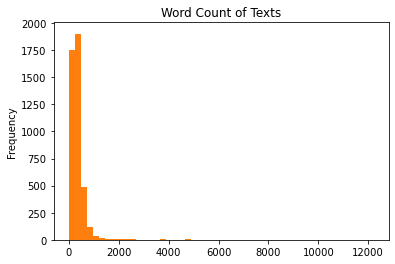

In [29]:
dataset['sum_word_count'].plot.hist(bins=20,title='Word Count of Summaries')
dataset['text_word_count'].plot.hist(bins=50,title='Word Count of Texts')
#,ylabel='Word Count'

(4, 2)


NameError: name 'values' is not defined

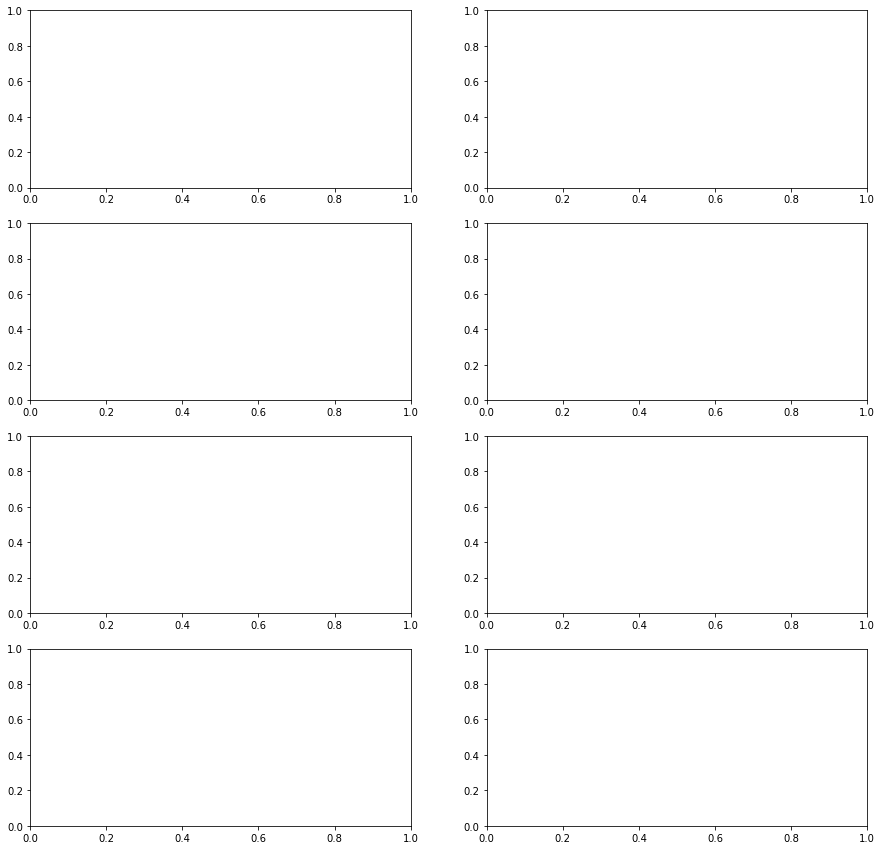

In [15]:
# Plot multiple Boxplots for the featrures
#Get the Cover Type values sorted
#We are defining an 3 x 4 matrix to help us plotting features
data=dataset

plot_vars=np.array([['sum_word_count','text_word_count'],['sum_char_count','text_char_count'],
                    ['sum_word_density','text_word_density'],['sum_punc_count','text_punc_count']])
print(plot_vars.shape)

f, axes = plt.subplots(4, 2, sharey=False, figsize=(15,15))
#fig1, ax1 = plt.subplots()
for i in range(plot_vars.shape[0]):
    for j in range(plot_vars.shape[1]):
        if plot_vars[i,j]!=None:
            for k in values:
                axes[i,j].hist(data[plot_vars[i,j]],alpha=0.7,histtype='bar',bins=30,label=str(k))
                
            axes[i,j].set_xlabel(plot_vars[i,j],labelpad=10,fontsize=10)
            if j==0:
                axes[i,j].set_ylabel('Count')
                axes[i,j].legend()
        else:
            axes[i,j].set_visible(False)

plt.show()

In [ ]:
plot_vars=np.array([['Elevation','Aspect','Slope',None],['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points'],['Hillshade_9am','Hillshade_Noon','Hillshade_3pm',None]])
plot_vars.shape

(4, 2)


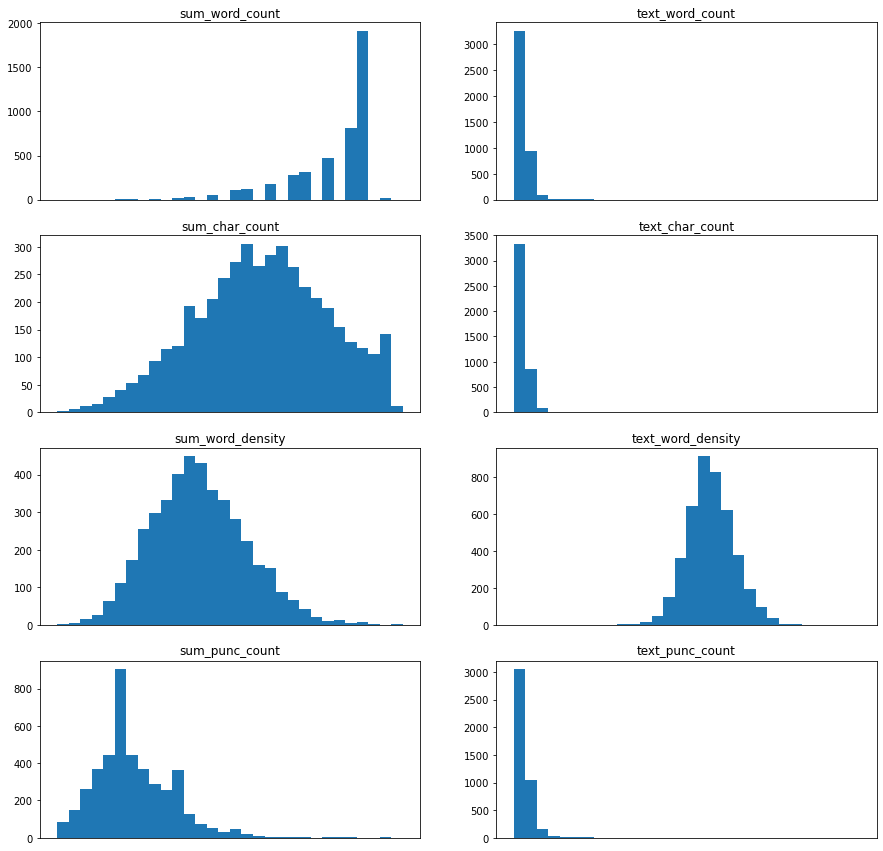

In [22]:
# Histograms for appicant featrures
data=dataset

plot_vars=np.array([['sum_word_count','text_word_count'],['sum_char_count','text_char_count'],
                    ['sum_word_density','text_word_density'],['sum_punc_count','text_punc_count']])
print(plot_vars.shape)

f, axes = plt.subplots(4, 2, sharey=False, figsize=(15,15))
#fig1, ax1 = plt.subplots()
for i in range(plot_vars.shape[0]):
    for j in range(plot_vars.shape[1]):
        if plot_vars[i,j]!=None:
            axes[i,j].set_title(plot_vars[i,j])
            axes[i,j].grid(False)
            axes[i,j].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
            axes[i,j].hist(data[plot_vars[i,j]],bins=30)
        else:
            axes[i,j].set_visible(False)

plt.show()

### Wordclouds for summary and text

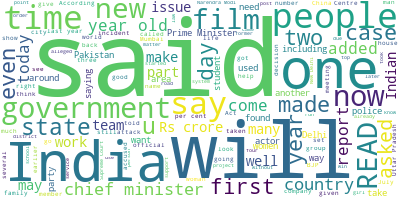

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(dataset['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

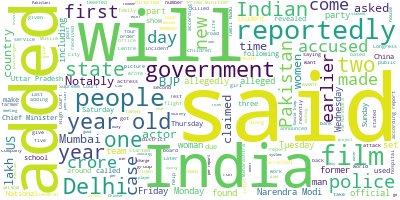

In [21]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(dataset['summary'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Topic Modelling

Link a revisar: 
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
Con herramientas para visualizarlos

Otro link:
https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
Visualizacion y detalle interesante

In [30]:
#Use LDA for topic modelling

#### Links:
https://www.kaggle.com/shivamb/seconds-from-disaster-text-eda-and-analysis

https://www.kaggle.com/caractacus/thematic-text-analysis-using-spacy-networkx